In [3]:
import numpy as np
import matplotlib
import matplotlib.dates as mdates
import sys

In [4]:

# line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
# load all data
dataset = read_csv(r"C:\Users\jaska\Downloads\household_power_consumption.txt", sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())

(1048414, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

In [3]:
# mark all missing values
dataset.replace('?',float('nan'), inplace=True)

In [4]:
# add a column for for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [5]:
# save updated dataset
dataset.to_csv('household_power_consumption.csv')

In [6]:
# load the new file
dataset = read_csv('household_power_consumption.csv', header=None)
print(dataset.head())

C:\Users\jaska\AppData\Local\Temp\ipykernel_5312\3905430786.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = read_csv('household_power_consumption.csv', header=None)


                     0                    1                      2        3  \
0             datetime  Global_active_power  Global_reactive_power  Voltage   
1  2006-12-16 17:24:00                4.216                  0.418  234.840   
2  2006-12-16 17:25:00                5.360                  0.436  233.630   
3  2006-12-16 17:26:00                5.374                  0.498  233.290   
4  2006-12-16 17:27:00                5.388                  0.502  233.740   

                  4               5               6               7  \
0  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3   
1            18.400           0.000           1.000            17.0   
2            23.000           0.000           1.000            16.0   
3            23.000           0.000           2.000            17.0   
4            23.000           0.000           1.000            17.0   

                8  
0  sub_metering_4  
1        52.26667  
2       72.333336  
3       70.566666 

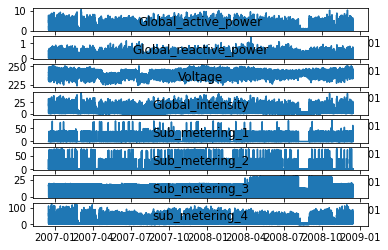

In [7]:
# line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# line plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	pyplot.plot(dataset[name])
	pyplot.title(name, y=0)
pyplot.show()

C:\Users\jaska\AppData\Local\Temp\ipykernel_5312\863399294.py:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[str(year)]


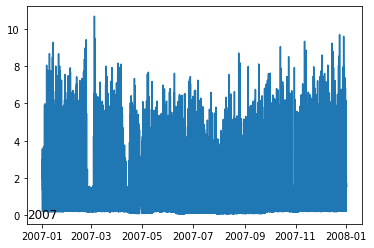

In [10]:
# yearly line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
years = ['2007']
pyplot.figure()
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[str(year)]
	# plot the active power for the year
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='left')
pyplot.show()

C:\Users\jaska\AppData\Local\Temp\ipykernel_5312\450942870.py:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[month]


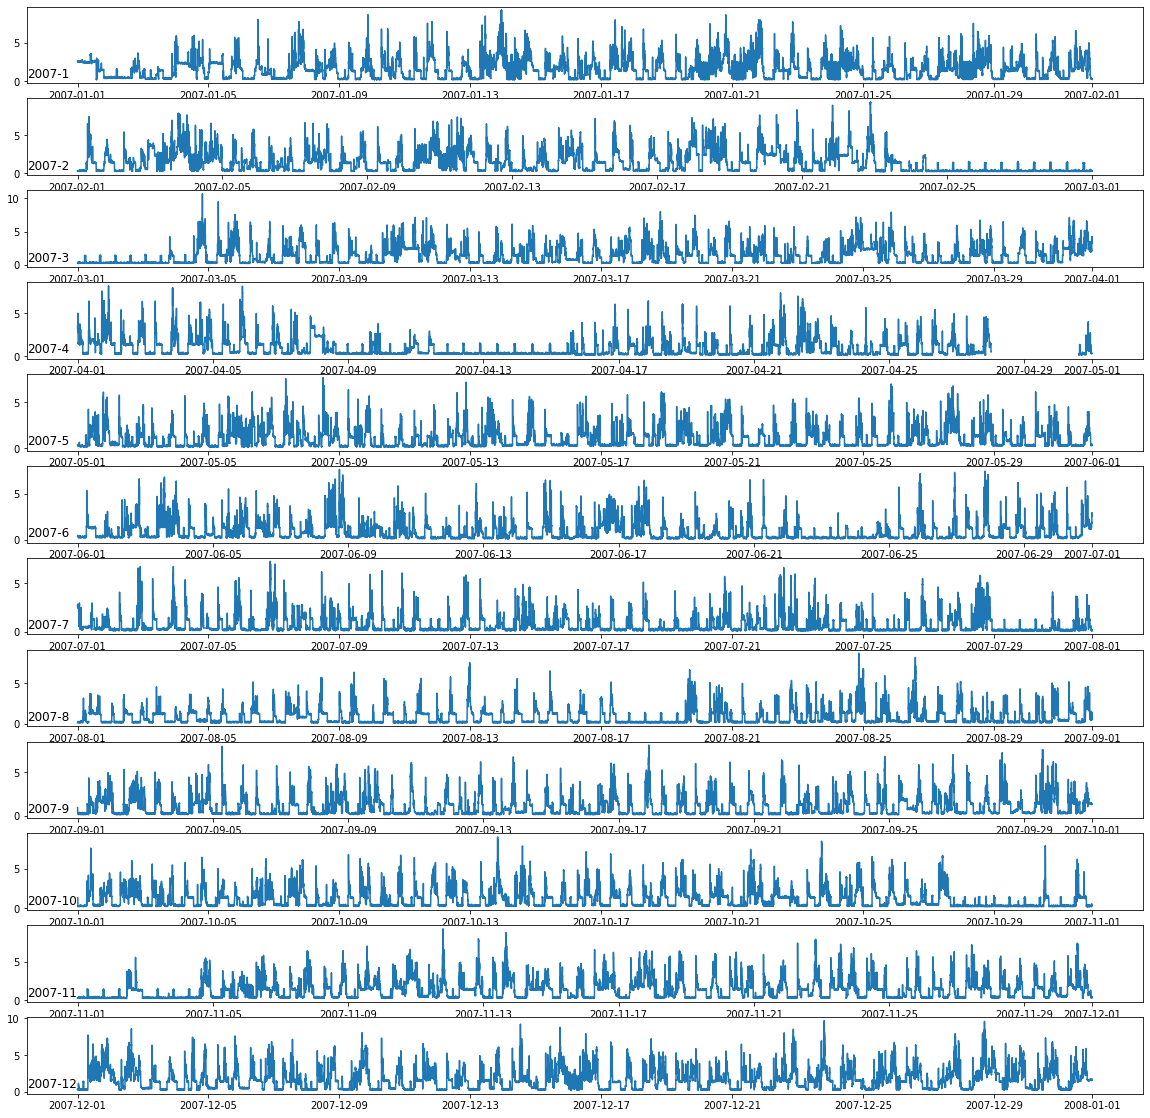

In [13]:

months = [x for x in range(1, 13)]
f=pyplot.figure()
f.set_figwidth(20)
f.set_figheight(20)

for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(month, y=0, loc='left')
pyplot.show()

C:\Users\jaska\AppData\Local\Temp\ipykernel_5312\1650009878.py:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[day]


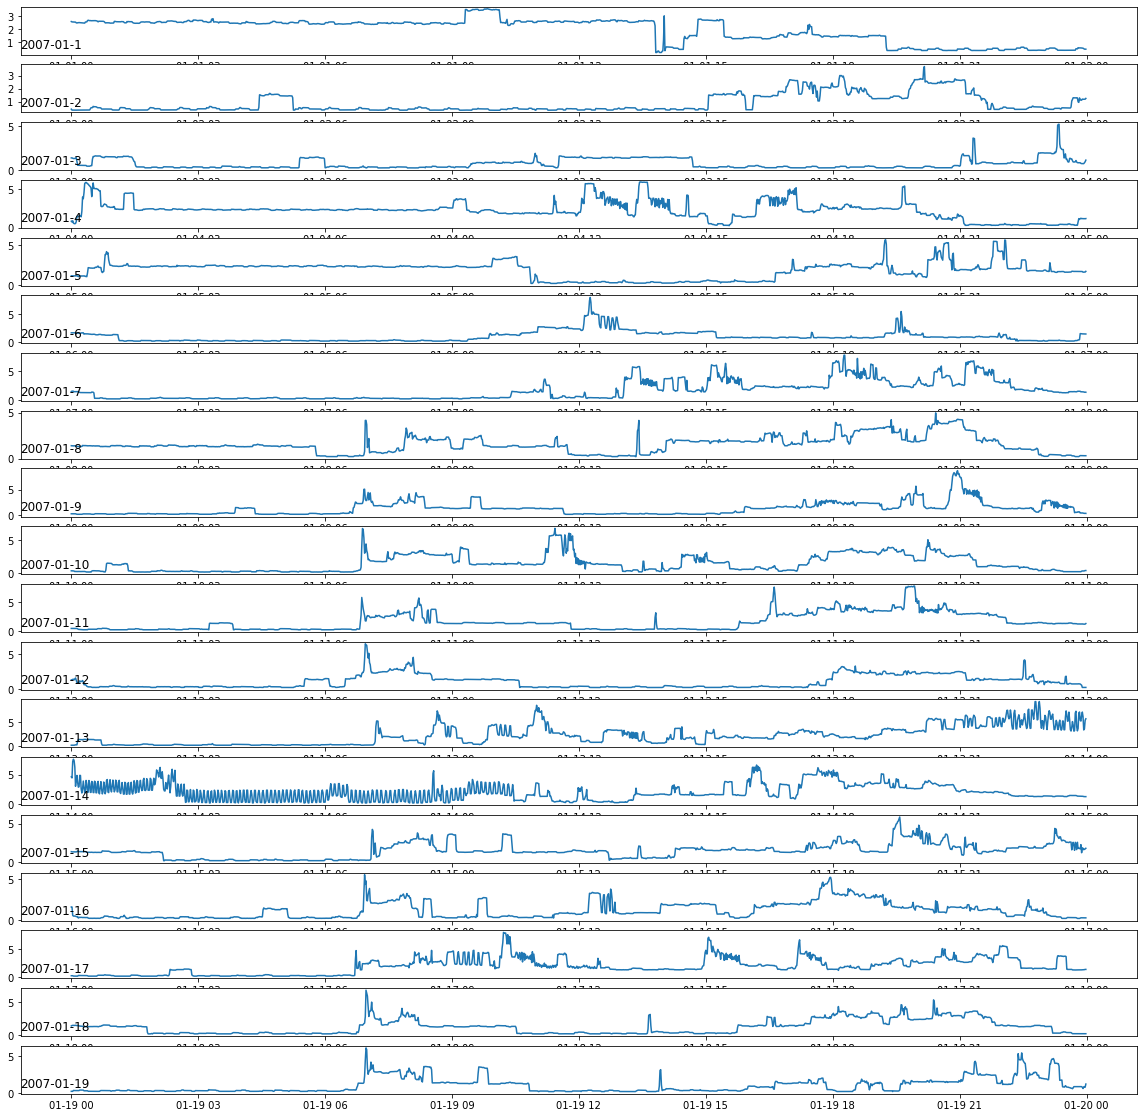

In [14]:
days = [x for x in range(1, 20)]

f=pyplot.figure()
f.set_figwidth(20)
f.set_figheight(20)
for i in range(len(days)):
	# prepare subplot
	ax = pyplot.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = '2007-01-' + str(days[i])
	# get all observations for the day
	result = dataset[day]
	# plot the active power for the day
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(day, y=0, loc='left')
pyplot.show()

In [1]:
#multivariate multi-step forecasting models
#data cleaning 


In [2]:
#add new csv with daily consumption grouped by day

daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

NameError: name 'dataset' is not defined